# Transformer Design Lab
---
```text
EE255 - Electric Power
Samarakoon S.M.O.T.
E/21/345
EE.21.B.23
```

## Import Libraries
```python

In [6]:
import numpy as np
import matplotlib.pyplot as plt

## Data 

In [7]:
percentage_full_load = np.array([30,40,50,60,80,90,100]) 

v_no_load_secondary = 20 # in volts

# primary side data
primary_voltage = np.array([120]*7) # in volts
primary_current = np.array([0.12,0.10,0.095,0.08,0.07,0.065,0.065]) # in amps
primary_wattmeter_reading = np.array([15,13,11,10,9,9,8]) # in watts

# secondary side data
secondary_voltage = np.array([16.6,17.2,17.4,17.6,18.2,18.0,18.2]) # in volts
secondary_current = np.array([0.52,0.39,0.325,0.275,0.215,0.19,0.18]) # in amps
secondary_wattmeter_reading = np.array([8,7,6,5,4,4,3]) # in watts

In [8]:
# function to calculate the power factor
def power_factor(primary_voltage, primary_current, primary_wattmeter_reading):
    # Calculate the power factor using the formula:
    # Power Factor = Wattmeter Reading / (Voltage * Current)
    
    return primary_wattmeter_reading / (primary_voltage * primary_current)

# function to calculate the voltage regulation
def voltage_regulation(secondary_voltage, v_no_load_secondary=20):
    # Calculate the voltage regulation using the formula:
    # Voltage Regulation = ((No Load Voltage - Full Load Voltage) / Full Load Voltage) * 100%
    
    return ((v_no_load_secondary - secondary_voltage) / secondary_voltage) * 100

# function to calculate the efficiency
def efficiency(primary_wattmeter_reading, secondary_wattmeter_reading):
    # Calculate the efficiency using the formula:
    # Efficiency = (Output Power / Input Power) * 100%
    
    return (secondary_wattmeter_reading / primary_wattmeter_reading) * 100

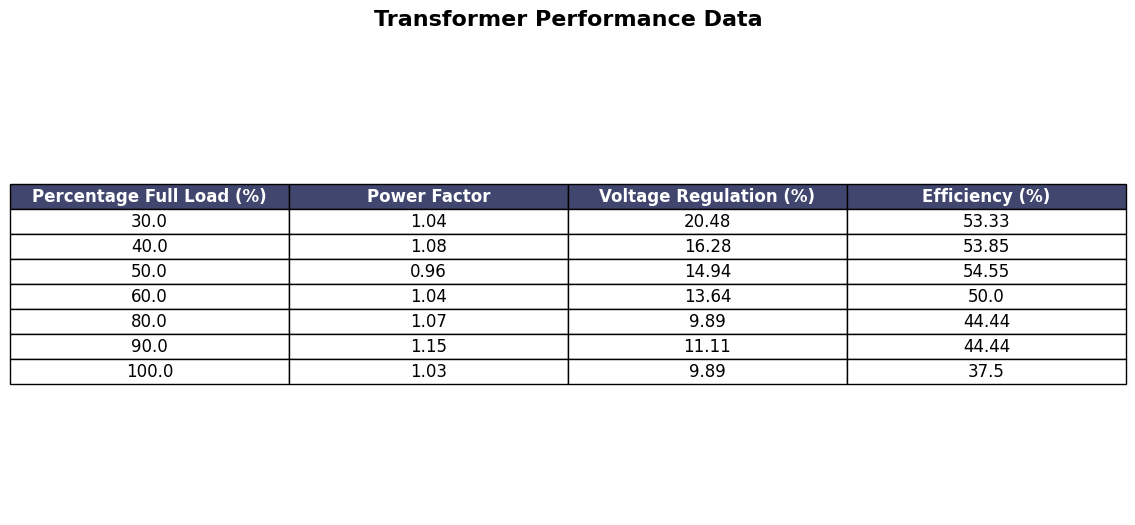

In [13]:
power_factors = power_factor(primary_voltage, primary_current, primary_wattmeter_reading)
voltage_regulations = voltage_regulation(secondary_voltage, v_no_load_secondary)
efficiencies = efficiency(primary_wattmeter_reading, secondary_wattmeter_reading)

# Create a table with the calculated values
table_data = np.column_stack((percentage_full_load, power_factors, voltage_regulations, efficiencies))

# Create the table
fig, ax = plt.subplots(figsize=(12, 6))
ax.axis('tight')
ax.axis('off')


# Create table
table = ax.table(cellText=np.round(table_data, 2),
                colLabels=['Percentage Full Load (%)', 'Power Factor', 'Voltage Regulation (%)', 'Efficiency (%)'],
                cellLoc='center',
                loc='center')

table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.5)

# Style the header
for i in range(len(columns)):
    table[(0, i)].set_facecolor('#40466e')
    table[(0, i)].set_text_props(weight='bold', color='white')

plt.title('Transformer Performance Data', fontsize=16, fontweight='bold', pad=20)
plt.show()


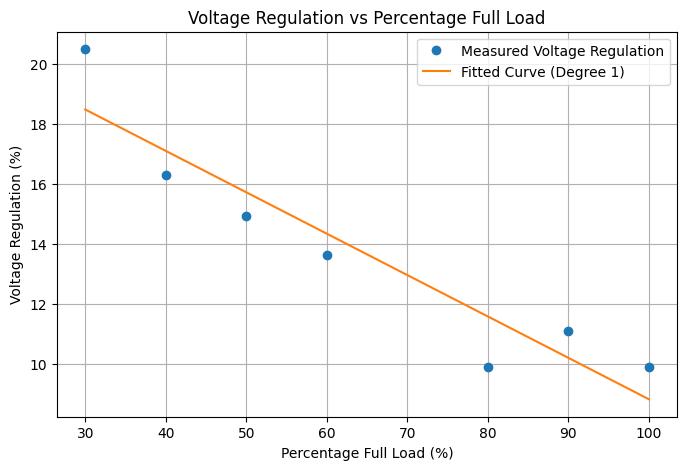

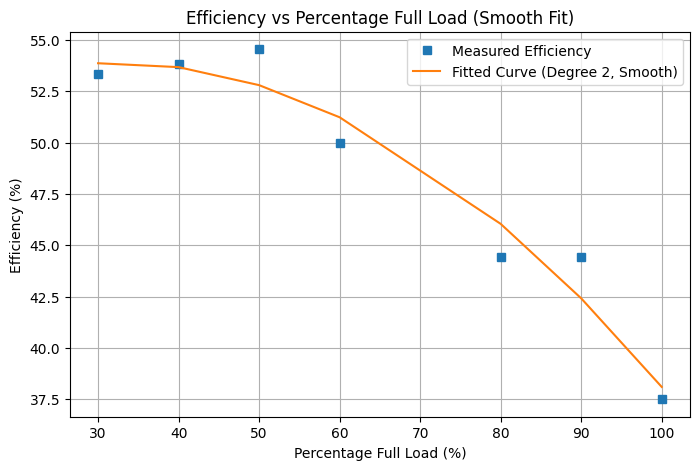

In [17]:
# Fit a polynomial curve (degree 2) for Voltage Regulation
coeffs_vr = np.polyfit(percentage_full_load, vr, 1)
fit_vr = np.polyval(coeffs_vr, percentage_full_load)

plt.figure(figsize=(8, 5))
plt.plot(percentage_full_load, vr, 'o', label='Measured Voltage Regulation')
plt.plot(percentage_full_load, fit_vr, '-', label='Fitted Curve (Degree 1)')
plt.xlabel('Percentage Full Load (%)')
plt.ylabel('Voltage Regulation (%)')
plt.title('Voltage Regulation vs Percentage Full Load')
plt.legend()
plt.grid(True)
plt.show()

# Fit a polynomial curve (degree 2) for Efficiency with a smoother fit
coeffs_eff_smooth = np.polyfit(percentage_full_load, eff, 2)
fit_eff_smooth = np.polyval(coeffs_eff_smooth, percentage_full_load)

plt.figure(figsize=(8, 5))
plt.plot(percentage_full_load, eff, 's', label='Measured Efficiency')
plt.plot(percentage_full_load, fit_eff_smooth, '-', label='Fitted Curve (Degree 2, Smooth)')
plt.xlabel('Percentage Full Load (%)')
plt.ylabel('Efficiency (%)')
plt.title('Efficiency vs Percentage Full Load (Smooth Fit)')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# ploting the variation of Voltage regulation vs percentage full load


